# PRAYAS MAZUMDER
# 2021CSB071
# MACHINE LEARNING LAB : ASS-3


In [25]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import pandas as pd

In [27]:
train_data = pd.read_csv('/content/drive/MyDrive/ML_DRIVE/Assign_3/train.csv')
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
test_data = pd.read_csv('/content/drive/MyDrive/ML_DRIVE/Assign_3/test.csv')
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# **TRAIN AND TEST SETS HAVE DIFFERENT COLUMNS , HENCE WE MAY NEED TO IGNORE THE TEST DATA SET AND CREATE  OUR OWN TEST DATA FROM TRAIN DATASET ITSELF ...**

FUNCTION TO PREPROCESS DATA

In [31]:
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [32]:
# Preprocessing function with column existence check
def preprocess_data(data):
    # Impute missing values for 'Age' if the column exists
    if 'Age' in data.columns:
        data['Age'].fillna(data['Age'].median(), inplace=True)

    # Impute missing values for 'Embarked' if the column exists
    if 'Embarked' in data.columns:
        data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

    # Drop columns if they exist in the dataset
    columns_to_drop = ['Cabin', 'Ticket', 'PassengerId', 'Name']
    data.drop(columns=[col for col in columns_to_drop if col in data.columns], inplace=True)

    # Create new features
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
    data['IsAlone'] = (data['FamilySize'] == 1).astype(int)

    # Extract title from the name (check if 'Name' exists first)
    if 'Name' in data.columns:
        data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

    # Map titles to numerical categories if 'Title' exists
    if 'Title' in data.columns:
        title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rev": 5, "Dr": 6,
                         "Col": 7, "Major": 7, "Mlle": 8, "Lady": 8, "Countess": 8,
                         "Ms": 8, "Mme": 8, "Capt": 9, "Sir": 9, "Don": 9, "Jonkheer": 9, "Dona": 9}
        data['Title'] = data['Title'].map(title_mapping).fillna(0)

    # Convert categorical variables into numeric (One-Hot Encoding)
    data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

    return data



In [33]:
# Preprocess both train and test datasets
train_data = preprocess_data(train_data)
test_data_preprocessed = preprocess_data(test_data)



In [34]:
from sklearn.model_selection import train_test_split

#split the training dataset
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.preprocessing import MinMaxScaler
# Standardize features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

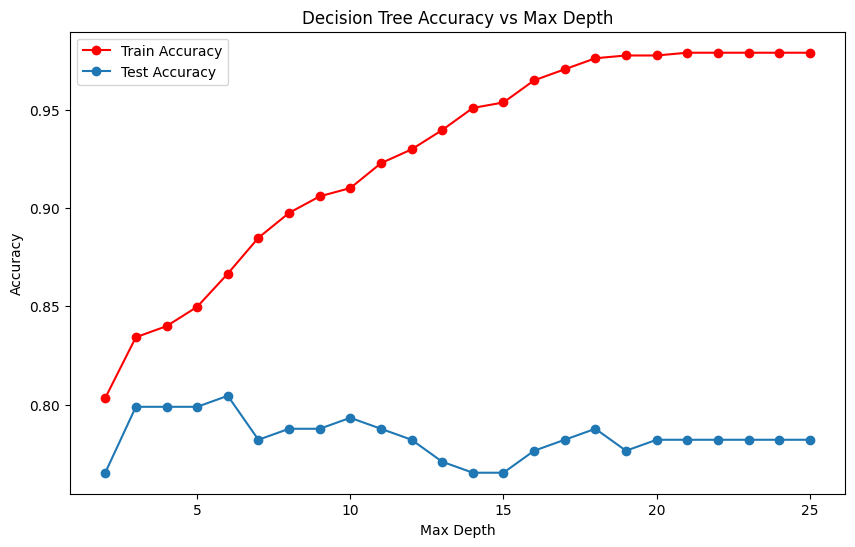

In [44]:
# Task 2: Decision Tree Classifier with varying max_depth
max_depths = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
train_accuracies = []
test_accuracies = []

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_clf.fit(X_train_scaled, y_train)

    train_accuracies.append(dt_clf.score(X_train_scaled, y_train))
    test_accuracies.append(dt_clf.score(X_test_scaled, y_test))

plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, marker='o', label='Train Accuracy' , color='r')
plt.plot(max_depths, test_accuracies, marker='o', label='Test Accuracy')
plt.title("Decision Tree Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

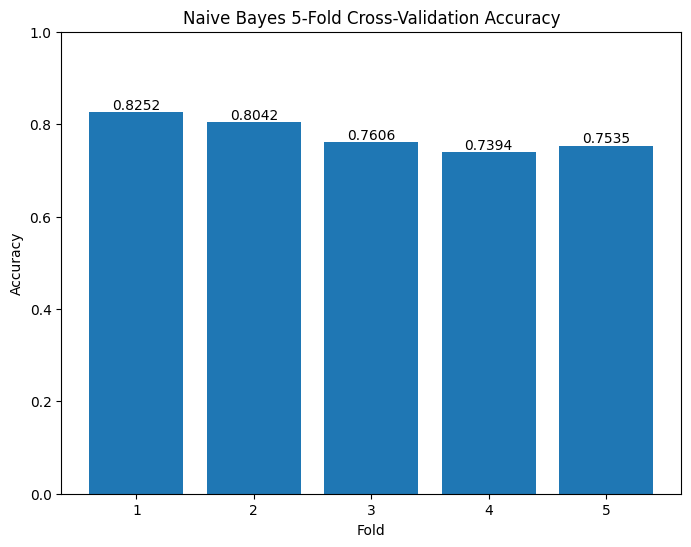

Average Naive Bayes Accuracy: 0.7766 (+/- 0.0651)


In [48]:
# Task 2a: Naive Bayes Classifier with 5-fold cross-validation
nb_clf = GaussianNB()
cv_scores = cross_val_score(nb_clf, X_train_scaled, y_train, cv=5)

plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), cv_scores)
plt.title("Naive Bayes 5-Fold Cross-Validation Accuracy")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
for i, score in enumerate(cv_scores):
    plt.text(i+1, score, f"{score:.4f}", ha='center', va='bottom')
plt.show()

print(f"Average Naive Bayes Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

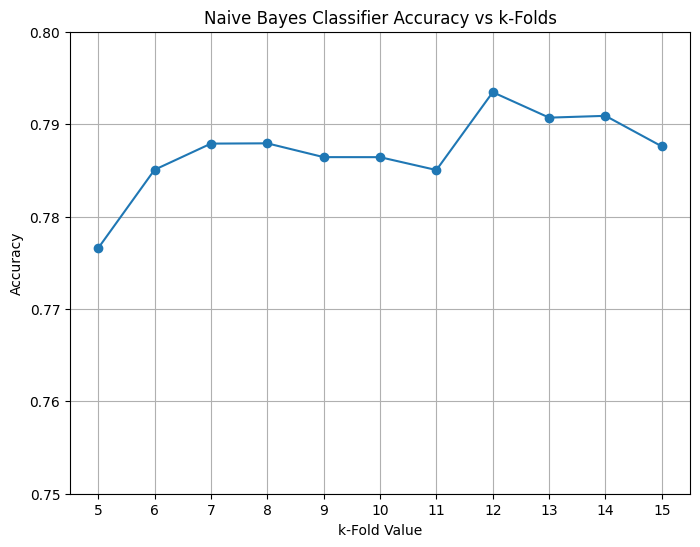

Naive Bayes Accuracy for 5-Fold: 0.7766
Naive Bayes Accuracy for 6-Fold: 0.7851
Naive Bayes Accuracy for 7-Fold: 0.7879
Naive Bayes Accuracy for 8-Fold: 0.7879
Naive Bayes Accuracy for 9-Fold: 0.7864
Naive Bayes Accuracy for 10-Fold: 0.7864
Naive Bayes Accuracy for 11-Fold: 0.7850
Naive Bayes Accuracy for 12-Fold: 0.7935
Naive Bayes Accuracy for 13-Fold: 0.7907
Naive Bayes Accuracy for 14-Fold: 0.7909
Naive Bayes Accuracy for 15-Fold: 0.7876


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Naive Bayes classifier
nb_clf = GaussianNB()

# Initialize list to store accuracies for different k-folds
k_values = range(5, 16)  # k from 5 to 10
accuracies = []


for k in k_values:
    # Perform k-fold cross-validation
    cv_scores = cross_val_score(nb_clf, X_train_scaled, y_train, cv=k)
    # Compute mean accuracy for current k
    accuracies.append(cv_scores.mean())

# Plot k-value vs accuracy
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-',label="Accuracy")
plt.title("Naive Bayes Classifier Accuracy vs k-Folds")
plt.xlabel("k-Fold Value")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.ylim(0.75, 0.8)
plt.grid(True)
plt.show()

# Print the accuracies for each k-fold value
for k, acc in zip(k_values, accuracies):
    print(f"Naive Bayes Accuracy for {k}-Fold: {acc:.4f}")
